<a href="https://colab.research.google.com/github/Iqrajahan/Logistic-Regression/blob/main/Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic regression**

Import all the required packages for logistic regression, manipulating dataframes, plotting and splititng the data into test and train subsets

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd # For our DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data1= pd.read_csv('/content/gdrive/MyDrive/Week20/datasets_228_482_diabetes.csv')

In [5]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#check if there are any missing values

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Seperate the independent and dependent variables
X=data1.drop('Outcome',axis=1)
y=data1['Outcome']

In [9]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [10]:
# Fit the model on train
model = LogisticRegression(solver="liblinear", penalty='l2', random_state=1)
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.118728  0.028685 -0.018905 -0.001959 -0.000215  0.054188  0.481219   

         7  intercept  
0  0.00353  -5.386551  


In [11]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7792207792207793


<Axes: >

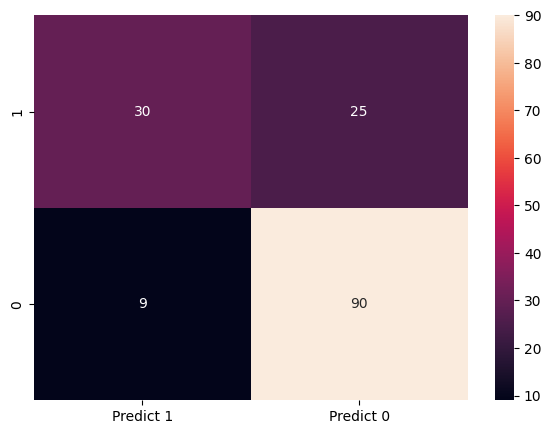

In [12]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 30

True Negatives (TN): we correctly predicted that they don't have diabetes 90

False Positives (FP):9 Falsely predict positive

False Negatives (FN): 25  Falsely predict negative


In [ ]:
print(metrics.classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       401
           1       0.74      0.54      0.62       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [ ]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



We can see that the F1 scores , precision and recall are close between test and train datasets and hence there is no issue of overfitting